**D1DAE: Análise Estatística para Ciência de Dados (2021.1)** <br/>
IFSP Campinas

Profs: Ricardo Sovat, Samuel Martins <br/><br/>

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Probability Distributions

## 1.2. Binomial Distribution

<img src="./imgs/binomial_distribution_ex.png" width=500/>

### Exercise 1

In an admission test for the Data Science specialization, **10 questions** with  **3 possible choices** in each question.<br/>
**Each question scores equally**. Suppose that a candidate have not been prepared for the test. She decided to guess all answers.<br/>
Let the test has the **maximum score of 10** and **cut-off score of 5** for being approved for the next stage.<br/>

Provide the _probability_ that this candidate will **get 5 questions right**, and the _probability_ that she will **advance to the next stage of the test**.<br/><br/>


#### Is this a Binomial experiment?

#### 1. How many trials (n)? (Fixed number of identical trials)

In [2]:
n = 10
n

10

#### 2. Are the trials independent?

Yes. One option chosen for a given question does not influence the chosen answer for the other questions.

#### 3. Are only two outcomes possible per trial?

Yes. The candidate has two possibilities: **hit** or **miss** the question.

#### 4. What is the probability of success (p) and failure (q)?

In [3]:
# question ==> 'trial´ 
n_choices_per_question = 3

In [4]:
# probabilidade de acertar uma questão
p = 1 / n_choices_per_question
p

0.3333333333333333

In [5]:
# probabilidade de errar uma questão
q = 1 - p
q

0.6666666666666667

Therefore, it is a **Binomial experiment**.

#### What is the total number of events that you want to get successes (x)? 

In [6]:
# queremos 5 questões corretas entre as 10 respondidas
x = 5
x

5

<br/>

#### Q1. What is the _probability_ that the candidate will get 5 questions right?

##### Solution 1

In [7]:
from scipy.special import comb

In [8]:
probability = comb(n, x) * (p ** x) * (q ** (n - x))
probability

0.13656454808718185

##### Solution 2

In [9]:
from scipy.stats import binom

In [10]:
probability = binom.pmf(x, n, p)
probability

0.1365645480871819

<br/>

#### Q2. How likely is the candidate to pass the test? (What is the _probability_ for that?)
<center><img src="./imgs/binomial_distribution_ex_Q2.png" width=500/></center>

##### Solution 1

In [11]:
probability = 0.0

# para cada número de questões acertadas possíveis para
# o cenário estudado
for x in range(5, 11):
    probability += binom.pmf(x, n, p)

In [12]:
probability

0.21312808006909525

##### Solution 2

In [13]:
1 - binom.cdf(4, n, p)

0.21312808006909512

##### Solution 3
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html

In [14]:
# a função abaixo é exatamente igual a:
# 1 - binom.cdf(4, n, p)
binom.sf(4, n, p)

0.21312808006909517

<br/>

### Exercise 2

In the last World Chess Championship, **the proportion of female participants was 60%.** <br/>
**The total of teams, with 12 members, in this year's championship is 30.** <br/>
According to these information, **how many teams should be formed by 8 women?** <br/><br/>



Let's first calculate the probability of a team has 8 women.

#### 1. How many trials (n)? (Fixed number of identical trials)

In [15]:
n = 12
n

12

#### 2. Are the trials independent?

Yes. The gender of each member is independent.

#### 3. Are only two outcomes possible per trial?

Yes: woman (success) and others (failure).

#### 4. What is the probability of success (p) and failure (q)?

In [16]:
p = 0.6
p

0.6

#### What is the total number of events that you want to get successes (x)? 

In [17]:
x = 8
x

8

#### Q: How many teams (out of 30) should be formed by 8 women?

In [18]:
# probability of a team (12 members) having 8 women
probability = binom.pmf(x, n, p)
probability

0.2128409395199996

##### Solution

#### mean = n * p

In [19]:
n = 30  # teams
n

30

In [20]:
p = probability  # probability of a team having 8 woman
p

0.2128409395199996

In [21]:
# What is the expected value (mean) of 30 trials (teams) having teams with 8 woman? 
n_teams = n * p
n_teams

6.385228185599988

<br/>

## 1.3. Poisson Distribution

<img src="./imgs/poisson_distribution_formula.png" width=600/>

### Exercise 1

A restaurant receives **20 orders per hour**. What is the chance that, at a given hour chosen at random, the restaurant will receive **15 orders**?

#### What is the mean number of occurrences per hour? (𝜆)

In [22]:
lambda_ = 20
lambda_

20

#### What is the desired number of occurrences within the period of time? (x)

In [23]:
x = 15
x

15

##### Solution 1

In [24]:
probability = ((np.e ** (-lambda_)) * (lambda_ ** x)) / np.math.factorial(x)
probability

0.0516488535317584

##### Solution 2
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html

In [25]:
from scipy.stats import poisson

In [26]:
probability = poisson.pmf(x, lambda_)
probability

0.05164885353175814

### Exercise 2

Vehicles pass through a junction on a busy road at an average rate of 300 per hour. <br/>

#### **Q1**: Find the probability that none passes in a given minute.

##### The average number of cars per minute (𝜆)

In [27]:
lambda_ = 300 / 60
lambda_

5.0

##### What is the desired number of occurrences within the period of time? (x)

In [28]:
x = 0
x

0

In [29]:
probability = poisson.pmf(x, lambda_)
probability

0.006737946999085467

#### **Q2**: What is the expected number (average number) passing in two minutes?

In [30]:
# alpha: average number of cars per ONE minute
expected_number_per_two_minutes = lambda_ * 2
expected_number_per_two_minutes

10.0

#### **Q3**: Find the probability that this expected number actually pass through in a given two-minute period.
Given that the average rate of vehicles that pass through in a busy road in **two minutes** is **10**, which is the probability of passing through **exactly 10 vehicles** in a given two-minute period?

##### The average number of cars per two minutes (𝜆)

In [31]:
lambda_ = expected_number_per_two_minutes
lambda_

10.0

##### What is the desired number of occurrences within the period of time? (x)

In [32]:
x = 10
x

10

In [33]:
probability = poisson.pmf(x, lambda_)
probability

0.12511003572113372

### Exercise 3

Suppose the **average number of lions** seen on a **1-day safari** is **5**. What is the probability that tourists will see **fewer than four lions** on the next 1-day safari?

#### What is the mean number of lions seen on a 1-day safari? (𝜆)

In [34]:
lambda_ = 5
lambda_

5

#### What is the desired number of occurrences within the period of time? (x)
x = 0, 1, 2, or 3

<img src="./imgs/poisson_distribution_ex3.png" width=400/>

##### Solution 1

In [35]:
probability = 0.0

for x in range(4):
    probability += poisson.pmf(x, lambda_)

probability

0.26502591529736164

##### Solution 2

In [36]:
probability = poisson.cdf(3, lambda_)
probability

0.2650259152973616

<br/>

## 1.4. Normal Distribution

<img src="./imgs/standard_normal_distribution_formula.png" width=700/>

### Exercise 1

When studying the height of the inhabitants of Pompeia, it was found that its **distribution is approximately normal**, with **mean** of 1.70 m and **standard deviation** of 0.1 m.

In [37]:
mean = 1.7
std = 0.1

#### Q1: Probability of a person, selected by chance, is less than 1.8m tall? P(X < 1.8)

In [38]:
x = 1.8
x

1.8

In [39]:
z = (x - mean) / std
z

1.0000000000000009

##### **P(X < 1.8) = P(Z < 1.000)**

##### Solution 1 - Using the z-score table
https://www.math.arizona.edu/~rsims/ma464/standardnormaltable.pdf

Checking the z-score table, **P(Z < 1.000)=0.84134**

##### Solution 2 - Using scipy

In [40]:
from scipy.stats import norm

In [41]:
probability = norm.cdf(1.000)
probability

0.8413447460685429

#### Q2: Probability of a person, selected by chance, is between 1.6m and 1.8m tall? P(1.6 <= X <= 1.8)
P(1.6 <= X <= 1.8) = P(X < 1.8) - P(X < 1.6)

In [42]:
a = 1.6
b = 1.8

In [43]:
z_a = (a - mean) / std
z_b = (b - mean) / std

z_a, z_b

(-0.9999999999999987, 1.0000000000000009)

**P(1.6 <= X <= 1.8) = P(Z < -0.9999) - P(Z < 1.00000)**

##### Solution 1 - Using the z-score table
https://www.math.arizona.edu/~rsims/ma464/standardnormaltable.pdf

In [44]:
prob_a = 0.16109
prob_b = 0.84134

In [45]:
probability = prob_b - prob_a
probability

0.68025

##### Solution 2 - Using scipy

In [46]:
probability = norm.cdf(z_b) - norm.cdf(z_a)
probability

0.6826894921370857

#### Q3: Probability of a person, selected by chance, is over 1.9m tall? P (X >= 1.9)
P(X >= 1.9) = 1 - P(X < 1.9)

In [47]:
x = 1.9
x

1.9

In [48]:
z = (x - mean) / std
z

1.9999999999999996

**P(X >= 1.9) = P(Z >= 1.99999) = 1 - P(Z < 1.99999)**

##### Solution 1 - Using the z-score table
https://www.math.arizona.edu/~rsims/ma464/standardnormaltable.pdf

In [49]:
cdf_z = 0.97725 # considerei z=2
probability = 1 - cdf_z
probability

0.022750000000000048

##### Solution 2 - Using scipy

In [50]:
probability = 1 - norm.cdf(z)
probability

0.02275013194817921

<br/>

# 2. Central Limit Theorem

**Dataset:** https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

In [51]:
# dataset with data about stroke patients
df = pd.read_csv('./datasets/healthcare-dataset-stroke-data.csv')

In [52]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [53]:
population = df['avg_glucose_level']
population

0       228.69
1       202.21
2       105.92
3       171.23
4       174.12
         ...  
5105     83.75
5106    125.20
5107     82.99
5108    166.29
5109     85.28
Name: avg_glucose_level, Length: 5110, dtype: float64

In [54]:
population_mean = population.mean()
population_mean

106.1476771037182

In [55]:
population_std = population.std()
population_std

45.28356015058198

Text(111.1476771037182, 350, 'Population Mean\n106.15')

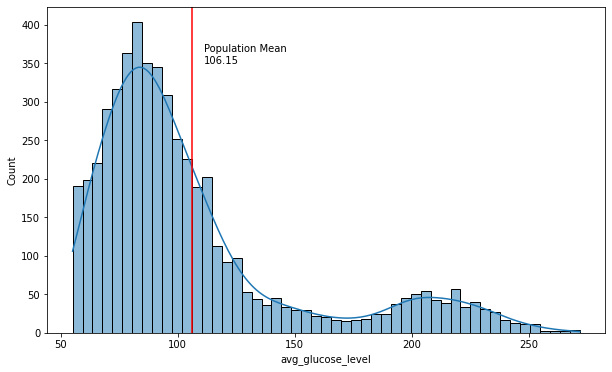

In [58]:
plt.figure(figsize=(10,6))
ax = sns.histplot(population, kde=True)  # the distribution is not normal
ax.axvline(x=population_mean, color='red')
ax.annotate(f'Population Mean\n{population_mean:.2f}', xy=(population_mean + 5, 350))

<br/>

#### The data distribution of a sample does not necessarily follow the **normal distribution**

In [57]:
sample_100 = population.sample(100, random_state=999)

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

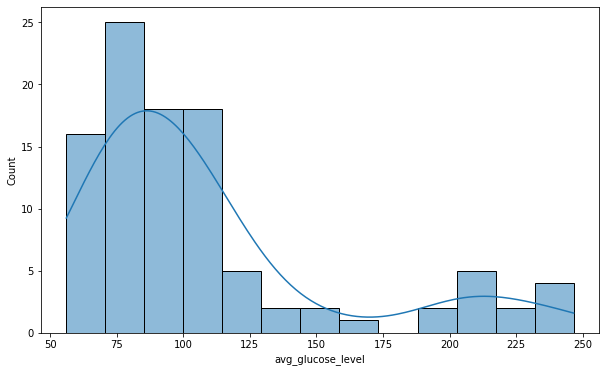

In [59]:
plt.figure(figsize=(10,6))
sns.histplot(sample_100, kde=True)

#### As the sample size increases, the **sampling distribution of the mean** approaches a **normal distribution** with the **sampling distribution’s mean** equals **the population mean**

In [60]:
# Dictionary where each key correspond to a sample size
# For each sample size, there is a dataframe with 1000 samples associated to
samples = {}

for n in [5, 10, 30, 100, 1000]:
    df_sample_size = pd.DataFrame()
    
    for i in range(1000):
        sample = population.sample(n)
        sample.reset_index(drop=True, inplace=True)  # requires this "trick" to work
        df_sample_size[f'Sample #{i}'] = sample
    
    samples[n] = df_sample_size

In [61]:
samples.keys()

dict_keys([5, 10, 30, 100, 1000])

In [62]:
samples[5]

,Sample #0,Sample #1,Sample #2,Sample #3,Sample #4,Sample #5,Sample #6,Sample #7,Sample #8,Sample #9,...,Sample #990,Sample #991,Sample #992,Sample #993,Sample #994,Sample #995,Sample #996,Sample #997,Sample #998,Sample #999
0,81.77,82.32,71.91,107.74,84.86,91.88,101.56,66.46,88.05,88.54,...,89.16,91.57,114.34,84.18,56.74,147.04,94.62,100.61,89.30,83.28
1,71.22,114.94,144.08,107.11,77.59,105.08,71.06,109.52,75.30,77.12,...,81.74,81.66,113.11,237.74,194.99,96.26,63.43,83.91,84.90,61.29
2,223.83,188.69,79.81,112.09,62.81,88.92,97.39,100.93,103.08,119.61,...,56.75,72.36,103.69,124.64,88.32,65.96,68.76,90.46,103.62,76.26
3,73.29,144.90,92.16,112.25,91.25,72.09,88.79,60.98,76.26,116.67,...,115.46,88.57,76.93,105.49,97.39,99.47,65.90,81.33,88.02,99.00
4,68.35,95.79,104.64,102.84,74.16,60.22,104.07,86.93,88.54,83.52,...,95.02,86.57,68.35,67.78,97.35,92.26,83.76,83.52,206.66,139.77


In [63]:
samples[100]

,Sample #0,Sample #1,Sample #2,Sample #3,Sample #4,Sample #5,Sample #6,Sample #7,Sample #8,Sample #9,...,Sample #990,Sample #991,Sample #992,Sample #993,Sample #994,Sample #995,Sample #996,Sample #997,Sample #998,Sample #999
0,191.94,96.85,90.57,59.36,68.48,103.37,65.12,128.72,85.98,196.58,...,90.62,235.63,210.23,106.13,78.43,83.82,96.62,229.21,223.68,95.66
1,56.30,77.44,102.54,101.35,103.94,158.89,60.53,123.95,99.91,68.60,...,124.66,58.03,74.24,94.14,70.55,100.84,107.47,110.84,80.88,116.84
2,65.34,69.04,65.34,74.23,77.37,95.81,60.01,207.60,83.16,225.35,...,94.38,231.54,80.21,199.14,65.09,57.95,138.47,79.64,113.34,104.03
3,239.52,98.71,85.07,55.35,59.86,111.84,82.44,176.34,63.28,77.66,...,109.69,76.08,80.55,97.55,77.91,90.43,68.40,72.49,124.78,99.67
4,62.60,73.24,97.58,105.51,62.60,92.86,122.50,164.67,111.48,102.07,...,74.23,86.92,111.15,70.07,78.24,85.48,97.90,78.75,111.65,64.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,77.01,107.46,219.80,68.40,97.59,62.20,122.46,70.53,89.68,126.34,...,218.65,94.63,75.25,237.17,216.90,82.40,81.51,70.03,84.88,84.70
96,135.79,167.31,69.16,196.61,95.33,57.02,105.73,111.19,76.56,74.81,...,98.61,122.83,80.99,61.75,149.15,110.33,95.59,56.47,114.71,104.77
97,91.95,59.68,78.52,97.93,84.44,92.35,93.89,207.58,227.68,195.25,...,141.16,120.44,221.29,87.06,68.37,147.14,81.87,234.58,115.42,76.03
98,69.72,121.11,77.92,91.13,70.34,63.78,97.78,78.48,74.29,61.04,...,88.41,100.29,90.51,231.72,119.67,62.61,83.73,58.81,112.30,90.10


In [64]:
# mean of each one of the 1000 samples with sample size of 100
samples[100].mean()

Sample #0      109.6160
Sample #1      103.1817
Sample #2      101.0369
Sample #3      100.9075
Sample #4      101.1544
                 ...   
Sample #995    104.8681
Sample #996    103.6366
Sample #997    111.2125
Sample #998    105.0462
Sample #999    110.3377
Length: 1000, dtype: float64

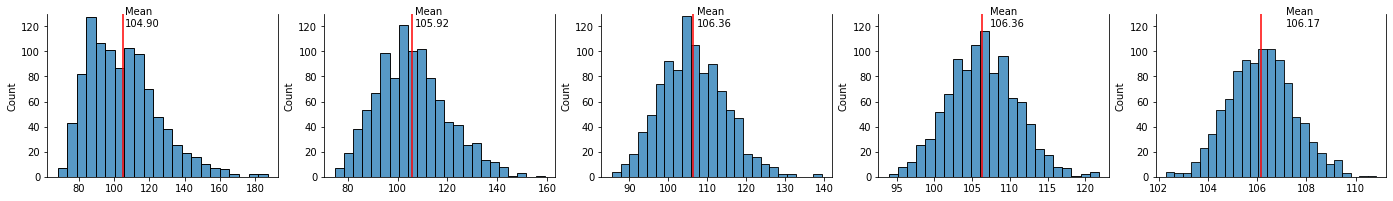

In [65]:
sample_sizes = sorted(samples.keys())

fig, axs = plt.subplots(1, 5, figsize=(24, 3))

for i, n in enumerate(sample_sizes):
    sampling_distribution = samples[n].mean()
    mean_of_sampling_distribution = sampling_distribution.mean()
    
    ax = sns.histplot(sampling_distribution, ax=axs[i])
    axs[i].axvline(x=mean_of_sampling_distribution, color='red')
    ax.annotate(f'Mean\n{mean_of_sampling_distribution:.2f}', xy=(mean_of_sampling_distribution + 1, 120))
    ax.spines['top'].set_visible(False)
    ax.set_ylim([0, 130])

#### Standard error

<img src='./imgs/standard_error.png' width=150 />

In [66]:
population_std

45.28356015058198

In [67]:
sample_sizes

[5, 10, 30, 100, 1000]

In [68]:
print(f'Population standard deviation = {population_std:.2f}\n')

for n in sample_sizes:
    standard_error = population_std / np.sqrt(n)
    print(f'Standard Error for n={n}: {standard_error:.2f}')

Population standard deviation = 45.28

Standard Error for n=5: 20.25
Standard Error for n=10: 14.32
Standard Error for n=30: 8.27
Standard Error for n=100: 4.53
Standard Error for n=1000: 1.43


**The larger the sample size, the smaller the standard error.**

<br/>

# 3. Confidence Interval

<img src='./imgs/confidence_interval.png' width=700 />

- A **90% level of confidence** has 𝜶 = 0.10 and **critical value** of 𝑧𝛼/2 = 1.64.
- A **95% level of confidence** has 𝜶 = 0.05 and **critical value** of 𝑧𝛼/2 = 1.96.
- A **99% level of confidence** has 𝜶 = 0.01 and **critical value** of 𝑧𝛼/2 = 2.58.

## Exercise 1
Suppose the heights of the inhabitants of a city are **normally distributed** with **population standard deviation** of 20 cm.
We measure the heights of **40** randomly chosen people, and get a **mean height** of 1.75 m.
Construct a **confidence interval** for the population mean with a **significance level of 5%**.

### Sample size

In [69]:
# sample_size
n = 40
n

40

### Population standard deviation and sample mean

In [70]:
population_std = 20
population_std

20

In [71]:
# x_bar
sample_mean = 175  # converting to the same unit
sample_mean

175

### Significance level (α)

In [72]:
significance_level = 0.05
significance_level

0.05

### Confidence level (1 - α)

In [73]:
confidence_level = 1 - significance_level
confidence_level

0.95

### Critical value (𝒛𝜶/𝟐 = z0.025)

In [74]:
critical_value = 1.96
critical_value

1.96

### Standard Error (SE)

In [75]:
standard_error = population_std / np.sqrt(n)
standard_error

3.162277660168379

### Margin of Error

In [76]:
margin_of_error = critical_value * standard_error
margin_of_error

6.198064213930023

### 95% Confidence Interval

#### Solution 1 - manually

In [77]:
confidence_interval = (
    sample_mean - margin_of_error,
    sample_mean + margin_of_error
)
confidence_interval

(168.80193578606998, 181.19806421393002)

#### Solution 2 - Scipy
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

alpha ==> confidence level <br/>
loc ==> sample mean  <br/>
scale ==> standard error

In [78]:
from scipy.stats import norm

In [79]:
norm.interval(alpha=confidence_level, loc=sample_mean, scale=standard_error)

(168.8020496769544, 181.1979503230456)

## Exercise 2
Given a dataset from stroke patients, we want to study their mean glucose level. <br/>
For two samples of 100 and 1000 observations, provide a 95% confidence intervals for the following scenarios:

**(a) Known population standard deviation** <br/>
**(b) Unknown population standard deviation**

**Dataset:** https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

In [80]:
# dataset with data about stroke patients
df = pd.read_csv('./datasets/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [81]:
population = df['avg_glucose_level']
population

0       228.69
1       202.21
2       105.92
3       171.23
4       174.12
         ...  
5105     83.75
5106    125.20
5107     82.99
5108    166.29
5109     85.28
Name: avg_glucose_level, Length: 5110, dtype: float64

In [82]:
population_mean = population.mean()
population_mean

106.1476771037182

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

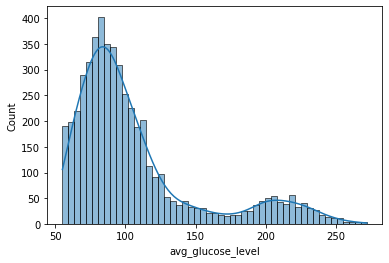

In [83]:
sns.histplot(data=population, kde=True)

#### Population Mean = 106.1476771037182

In [84]:
population_std = population.std()
population_std

45.28356015058198

In [85]:
confidence_level = 0.95
confidence_level

0.95

In [86]:
significance_level = 1 - confidence_level
significance_level

0.050000000000000044

In [87]:
sample_100 = population.sample(100, random_state=999)
sample_100

4358     80.94
4779     66.71
931      78.11
3917     90.00
1095    103.94
         ...  
1566    101.43
222     205.35
3075     80.92
580     107.47
1947     65.95
Name: avg_glucose_level, Length: 100, dtype: float64

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

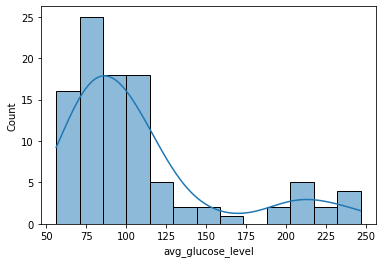

In [88]:
sns.histplot(data=sample_100, kde=True)

In [89]:
sample_1000 = population.sample(1000, random_state=999)
sample_1000

4358     80.94
4779     66.71
931      78.11
3917     90.00
1095    103.94
         ...  
3278     84.70
1204    121.19
490      65.24
2650     59.00
34       84.20
Name: avg_glucose_level, Length: 1000, dtype: float64

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

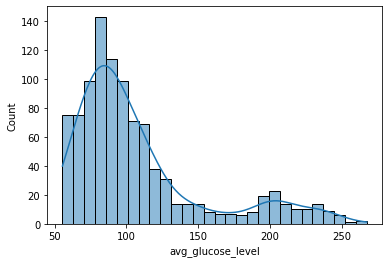

In [90]:
sns.histplot(data=sample_1000, kde=True)

#### **(a) Known population standard deviation, and sample sizes of 100 and 1000**

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

alpha ==> confidence level <br/>
loc ==> sample mean  <br/>
scale ==> standard error

#### Sample size 100

In [91]:
n = 100
n

100

In [92]:
sample_100_mean = sample_100.mean()
sample_100_mean

107.90570000000001

In [93]:
standard_error_100 = population_std / np.sqrt(n)
standard_error_100

4.528356015058198

In [94]:
norm.interval(alpha=confidence_level, loc=sample_100_mean, scale=standard_error_100)

(99.03028530131063, 116.7811146986894)

#### Sample size 1000

In [95]:
n = 1000
n

1000

In [96]:
sample_1000_mean = sample_1000.mean()
sample_1000_mean

107.67422

In [97]:
standard_error_1000 = population_std / np.sqrt(n)
standard_error_1000

1.4319919063707645

In [98]:
norm.interval(alpha=confidence_level, loc=sample_1000_mean, scale=standard_error_1000)

(104.86756743736045, 110.48087256263956)

#### **(b) Unknown population standard deviation, and sample sizes of 100 and 1000**

#### Sample size 100

In [99]:
n = 100
n

100

In [100]:
sample_100_mean = sample_100.mean()
sample_100_mean

107.90570000000001

In [101]:
sample_100_std = sample_100.std()
sample_100_std

47.96907099613587

In [102]:
standard_error_100 = sample_100_std / np.sqrt(n)
standard_error_100

4.796907099613587

In [103]:
norm.interval(alpha=confidence_level, loc=sample_100_mean, scale=standard_error_100)

(98.50393484757289, 117.30746515242713)

#### Sample size 1000

In [104]:
n = 1000
n

1000

In [105]:
sample_1000_mean = sample_1000.mean()
sample_1000_mean

107.67422

In [106]:
sample_1000_std = sample_1000.std()
sample_1000_std

46.15896726585909

In [107]:
standard_error_1000 = sample_1000_std / np.sqrt(n)
standard_error_1000

1.459674710012697

In [108]:
norm.interval(alpha=confidence_level, loc=sample_1000_mean, scale=standard_error_1000)

(104.81331013923118, 110.53512986076883)

# 4. Calculating Sample Sizes

<img src='./imgs/calculating_sample_sizes.png' width=700/>

## Exercise 1
Suppose we want to investigate the **mean income** from the brazilian population. According to the last census, the **population standard deviation** is **R\$ 4000,00**. Assuming a **95\% confidence level** and a **margin of error** (with respect to the sample mean) of **R\$ 100,00**, what should be the **sample size**? 

### Population standard deviation (𝜎)

In [109]:
population_std = 4000
population_std

4000

### Confidence level (1 - α)

In [110]:
confidence_level = 0.95
confidence_level

0.95

### Significance level (α)

In [111]:
significance_level = 1 - confidence_level
significance_level

0.050000000000000044

### Margin of Error (e)

In [112]:
margin_of_error = 100
margin_of_error

100

### Critical value (𝒛𝜶/𝟐 = z0.025)

In [113]:
critical_value = 1.96
critical_value

1.96

### Calculating the sample size (n)

In [114]:
n = (critical_value * (population_std / margin_of_error)) ** 2
n

6146.560000000001

In [115]:
n = int(round(n))
n

6147

## Exercise 2
In a batch of **10,000 cans** of soda, a simple random sample of **200 cans** was collected to validate the amount of soda. The found **sample standard deviation** was **16 ml**. Each can costs **R\$ 4,00** and is thrown away after the experiment.

The manufacturer stipulates a **maximum error on the population average of only 4 ml**. To ensure a **95\% confidence level** what sample size should be selected for this study? How much  will the company save in the next experiment/validation?

### Population size (N)

In [116]:
N = 10000
N

10000

### Calculating the critical value (z-score ==> 𝒛𝜶/𝟐 == z0.025): 95% confidence level

In [117]:
critical_value = 1.96
critical_value

1.96

### Calculating the sample standard deviation (s)

In [118]:
sample_std = 16
sample_std

16

### Margin of Error (e)

In [119]:
margin_of_error = 4
margin_of_error

4

### Calculating the sample size (n)

In [120]:
n = ((critical_value ** 2) * (sample_std ** 2) * N) / (((critical_value ** 2) * (sample_std ** 2)) + ((margin_of_error ** 2) * (N - 1)))
n

61.096178292185606

In [121]:
n = int(round(n))
n

61

Note that the number of cans (sample size) necessary to meet the requirements is **61**. Therefore, it is not necessary to collect 200 cans as was done before, thus saving money.

### Savings

In [122]:
cost_per_can = 4
cost_per_can

4

In [123]:
(200 - n) * cost_per_can

556

The company will save R$ 556 in the next experiments.

# 5. Bootstrap Confidence Interval

<img src='./imgs/bootstrap_confidence_interval.png' width=700 />

## Exercise
Given the dataset from stroke patients, we want to study their **mean glucose level**.
Provide **95% bootstrap confidence intervals** for sample sizes of **100** and **1000**.

**Dataset:** https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

In [136]:
# dataset with data about stroke patients
df = pd.read_csv('./datasets/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [137]:
population = df['avg_glucose_level']
population

0       228.69
1       202.21
2       105.92
3       171.23
4       174.12
         ...  
5105     83.75
5106    125.20
5107     82.99
5108    166.29
5109     85.28
Name: avg_glucose_level, Length: 5110, dtype: float64

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

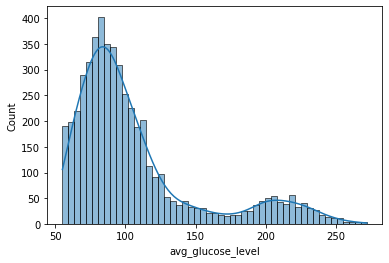

In [138]:
sns.histplot(population, kde=True)

#### True **Population Mean**

In [139]:
population.mean()

106.1476771037182

### Sample size: 100

1. Get a sample S from the population

In [140]:
n = 100
n

100

In [141]:
# original sample
sample_100 = population.sample(n, random_state=999)
sample_100

4358     80.94
4779     66.71
931      78.11
3917     90.00
1095    103.94
         ...  
1566    101.43
222     205.35
3075     80.92
580     107.47
1947     65.95
Name: avg_glucose_level, Length: 100, dtype: float64

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

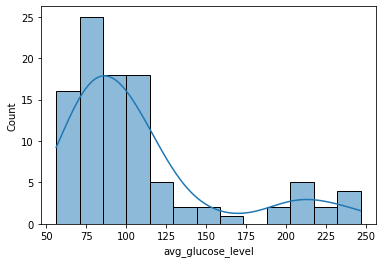

In [142]:
sns.histplot(sample_100, kde=True)

2. Repeat k times:<br/>
    2.1. Generate a bootstrap sample by **resampling S**<br/>
    2.2. Calculate the desired statistic for the bootstrap sample

In [143]:
k = 10000
k

10000

In [144]:
# bootstrap_sampling_distribution = []

# for i in range(k):
#     bootstrap_sample = sample_100.sample(n, replace=True, random_state=i)  # resampling
#     mean = bootstrap_sample.mean()
#     bootstrap_sampling_distribution.append(mean)

bootstrap_sampling_distribution = [sample_100.sample(n, replace=True, random_state=i).mean() for i in range(k)]
bootstrap_sampling_distribution[:5]

[108.5844,
 108.4843,
 120.19560000000001,
 101.84260000000003,
 114.84280000000001]

In [146]:
len(bootstrap_sampling_distribution)

10000

3. Build the sampling distribution for the statistic

<AxesSubplot:ylabel='Count'>

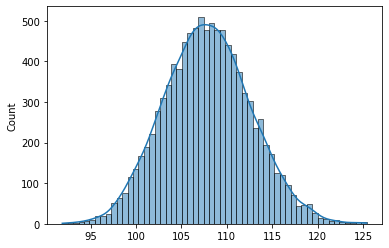

In [145]:
sns.histplot(bootstrap_sampling_distribution, kde=True)

4. Compute the interval around the mean with the concentration of c% observations/values<br/>
    4.1. c% is the confidence level = 1 – α<br/>
    4.2. The interval consists of the α/2 percentile and (1 - α/2) percentile <br/>
    4.3. Thus, just sort the statistics and return the values of theses percentiles

### ALTERNATIVE 1

In [147]:
confidence_level, significance_level

(0.95, 0.050000000000000044)

In [148]:
sorted_bootstrap_sampling_distribution = sorted(bootstrap_sampling_distribution)
sorted_bootstrap_sampling_distribution[:5]

[91.884, 92.37990000000002, 92.4456, 92.80840000000002, 93.0234]

In [149]:
percentile_x1 = significance_level / 2
percentile_x1

0.025000000000000022

In [150]:
percentile_x2 = 1 - (significance_level / 2)
percentile_x2

0.975

In [151]:
len(sorted_bootstrap_sampling_distribution), k

(10000, 10000)

In [152]:
index_percentile_x1 = int(percentile_x1 * k)
index_percentile_x1

250

In [153]:
index_percentile_x2 = int(percentile_x2 * k)
index_percentile_x2

9750

In [154]:
confidence_interval = (
    sorted_bootstrap_sampling_distribution[index_percentile_x1],
    sorted_bootstrap_sampling_distribution[index_percentile_x2]
)
confidence_interval

(98.8362, 117.3978)

### ALTERNATIVE 2

In [156]:
np.percentile(bootstrap_sampling_distribution, 2.5), \
np.percentile(bootstrap_sampling_distribution, 97.5)

(98.8361825, 117.39633750000002)

#### Boostrap Sampling Distribution Mean 

In [157]:
population.mean() - np.array(bootstrap_sampling_distribution).mean()

-1.7174511962818144

### Sample size: 1000

1. Get a sample S from the population

In [158]:
n = 1000
n

1000

In [159]:
# original sample
sample_1000 = population.sample(n, random_state=999)
sample_1000

4358     80.94
4779     66.71
931      78.11
3917     90.00
1095    103.94
         ...  
3278     84.70
1204    121.19
490      65.24
2650     59.00
34       84.20
Name: avg_glucose_level, Length: 1000, dtype: float64

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

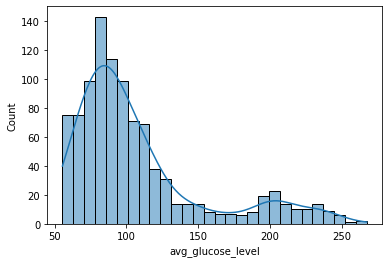

In [160]:
sns.histplot(sample_1000, kde=True)

2. Repeat k times:<br/>
    2.1. Generate a bootstrap sample by **resampling S**<br/>
    2.2. Calculate the desired statistic for the bootstrap sample <br/>
3. Build the sampling distribution for the statistic

Instead of doing these steps "manually", we can use the method `bootstrap` from the Seaborn package.

In [161]:
k

10000

In [162]:
bootstrap_sampling_distribution_1000 = sns.algorithms.bootstrap(sample_1000, n_boot=k, func=np.mean, seed=999)
bootstrap_sampling_distribution_1000[:5]

array([111.18174, 108.15991, 107.57348, 108.22721, 110.0502 ])

<AxesSubplot:ylabel='Count'>

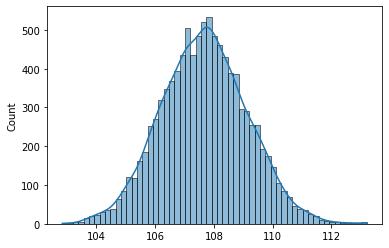

In [163]:
sns.histplot(bootstrap_sampling_distribution_1000, kde=True)

4. Compute the interval around the mean with the concentration of c% observations/values<br/>
    4.1. c% is the confidence level = 1 – α<br/>
    4.2. The interval consists of the α/2 percentile and (1 - α/2) percentile <br/>
    4.3. Thus, just sort the statistics and return the values of theses percentiles

In [164]:
confidence_interval = (
    np.percentile(bootstrap_sampling_distribution_1000, 2.5),
    np.percentile(bootstrap_sampling_distribution_1000, 97.5)
)
confidence_interval

(104.86168050000002, 110.520456)

#### Boostrap Sampling Distribution Mean 

In [165]:
population.mean() - np.array(bootstrap_sampling_distribution_1000).mean()

-1.5170042232818162

# 6. Comparing the Calculated 95% Confidence Intervals

In [166]:
confidence_interval_table = pd.DataFrame({
    'Sample Size: 100': [(99.03, 116.78), (98.50, 117.30), (98.83, 117.39)],
    'Sample Size: 1000': [(104.86, 110.48), (104.81, 110.53), (104.86, 110.52)]
}, index=[('Confidence Interval - Known population std'),
          ('Confidence Interval - Unknown population std'),
         'Bootstrap']
)

In [167]:
confidence_interval_table

,Sample Size: 100,Sample Size: 1000
Confidence Interval - Known population std,"(99.03, 116.78)","(104.86, 110.48)"
Confidence Interval - Unknown population std,"(98.5, 117.3)","(104.81, 110.53)"
Bootstrap,"(98.83, 117.39)","(104.86, 110.52)"


#### Population Mean = 106.1476771037182